# Analyzing results of one experiment.
### Finding std of std and mean
### plotting the predictions
### plotting kde
### KS test

### Solar_nips rate has 

137 train series

959 test series = 137 * 7

the prediction length is 24 hours

(solar-energy has 24 of 10 minutes)

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt


In [2]:
from src.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/solar_nips/1B'

# Forecast section

## Load data

In [5]:
# read the forcast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1)

201it [00:00, 41056.55it/s]
100%|###########| 100/100 [00:32<00:00,  3.04it/s]


In [6]:
len(forcast_list1)

100

In [7]:
forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
0,1,0,2006-10-20 01:00:00,0.0,-0.742047,-0.203200,-0.277325,-0.551367,-0.600623,-1.001803,...,-0.913120,-0.510041,-0.675938,-1.260866,-0.183558,-0.918473,0.073991,-0.239781,-1.187907,-0.339510
1,1,0,2006-10-20 02:00:00,0.0,-1.743378,-0.214946,-0.772641,-1.029578,-0.487901,-0.731136,...,-1.641011,-0.056627,-0.340193,-1.663200,-1.525399,-0.954588,-0.361859,-1.064016,-0.796125,-0.307453
2,1,0,2006-10-20 03:00:00,0.0,-1.073546,-0.816910,-0.820820,-0.695998,0.600383,-0.259915,...,-1.172554,0.703891,-1.181208,-0.630280,-1.300757,-1.203200,-1.516567,-0.788018,-0.995302,-0.636260
3,1,0,2006-10-20 04:00:00,0.0,-0.047769,-1.032798,-0.845372,-0.491349,-0.046801,-0.151636,...,-0.155778,0.092287,3.124672,-0.937145,-0.739919,-0.736194,-0.341169,-0.545968,-0.210840,-0.739056
4,1,0,2006-10-20 05:00:00,0.0,-3.375780,-0.162367,-0.856468,-0.327593,-0.416783,-1.416170,...,-0.162503,1.590711,0.452908,-0.710379,-0.807462,-0.055793,-1.886182,-0.685818,-6.461552,2.887984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23011,1,958,2006-10-26 20:00:00,0.0,-0.094709,-0.231885,-0.109040,-1.083381,-0.325262,-0.888064,...,0.387439,-1.126478,-0.071843,-0.795572,0.004288,-0.448981,-0.057285,-0.202156,-0.197834,-0.292541
23012,1,958,2006-10-26 21:00:00,0.0,0.122314,-0.487403,0.042555,-0.060860,0.169501,-0.459135,...,0.129119,-0.297093,-0.305992,-0.109717,-0.230967,-0.512644,-0.473525,-0.059877,-0.155172,-0.684587
23013,1,958,2006-10-26 22:00:00,0.0,-0.754880,-0.468468,-0.334545,-0.605634,-0.250339,-0.532736,...,-0.277874,-0.644757,-0.508371,-0.416131,0.063078,0.160877,-0.293786,-0.185495,-1.786183,-0.219911
23014,1,958,2006-10-26 23:00:00,0.0,-0.444462,-0.065051,-0.184848,-0.246095,0.077091,-0.412891,...,0.008751,-0.761209,0.018096,-0.107693,-0.366111,-0.133752,-0.122606,-0.347198,-0.576326,-0.308988


In [8]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=137)

In [9]:
sorted_forcast_list1[0].head(151)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2006-10-20 01:00:00,0.00,-0.742047,-0.203200,-0.277325,-0.551367,-0.600623,-1.001803,...,-0.183558,-0.918473,0.073991,-0.239781,-1.187907,-0.339510,0,-0.690439,0.818312,0.115118
1,1,0,2006-10-20 02:00:00,0.00,-1.743378,-0.214946,-0.772641,-1.029578,-0.487901,-0.731136,...,-1.525399,-0.954588,-0.361859,-1.064016,-0.796125,-0.307453,0,-0.579343,0.929312,0.098718
2,1,0,2006-10-20 03:00:00,0.00,-1.073546,-0.816910,-0.820820,-0.695998,0.600383,-0.259915,...,-1.300757,-1.203200,-1.516567,-0.788018,-0.995302,-0.636260,0,-0.562992,0.590150,0.133140
3,1,0,2006-10-20 04:00:00,0.00,-0.047769,-1.032798,-0.845372,-0.491349,-0.046801,-0.151636,...,-0.739919,-0.736194,-0.341169,-0.545968,-0.210840,-0.739056,0,-0.545746,0.736976,0.138725
4,1,0,2006-10-20 05:00:00,0.00,-3.375780,-0.162367,-0.856468,-0.327593,-0.416783,-1.416170,...,-0.807462,-0.055793,-1.886182,-0.685818,-6.461552,2.887984,0,-0.137319,1.825014,0.133739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,822,2006-10-26 03:00:00,0.00,-1.180062,-1.257748,0.051563,-1.353240,-0.509552,-0.510922,...,-0.718850,0.089637,-0.359563,-0.691653,-1.177138,-1.291625,0,-0.635471,0.582567,0.140537
147,1,822,2006-10-26 04:00:00,0.00,1.330876,-0.712738,-0.558139,-0.895515,-1.147540,-0.432276,...,0.085586,-0.253875,-0.858944,-0.991195,-0.110027,-0.561056,0,-0.461740,0.599371,0.144475
148,1,822,2006-10-26 05:00:00,0.00,-4.235586,4.326555,-2.561280,-2.072797,-4.362207,-2.159659,...,-1.140646,-12.909544,-3.837479,-0.767202,-1.141231,-2.418288,0,-2.418259,7.314392,0.089092
149,1,822,2006-10-26 06:00:00,5.10,53.287090,64.563700,54.884228,48.924034,39.834330,39.595210,...,60.796120,23.199210,43.228916,58.116066,57.165268,79.667854,0,47.632528,55.224218,0.088523


## get each time series individually

In [10]:
target_forcast_series = get_forcast_target(forcast_list1)

In [11]:
# this dataframe is just one time series
ts_number = 10
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)

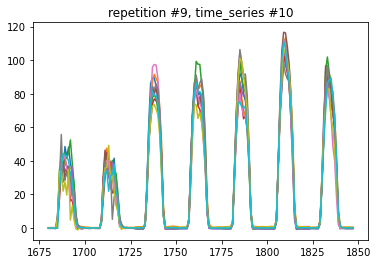

In [12]:
# plot mean of only one time series
rep_no = 1
for rep_no in range(10):
    plt.title(f'repetition #{rep_no}, time_series #{ts_number}')
    ts_list1[rep_no]['mean'].plot()
    # plt.xlim(20600,20700)

## plot the kde for experiments

for each datapoint in data_n, it plots kde of different repetition. number of repetition is 'max_shape'

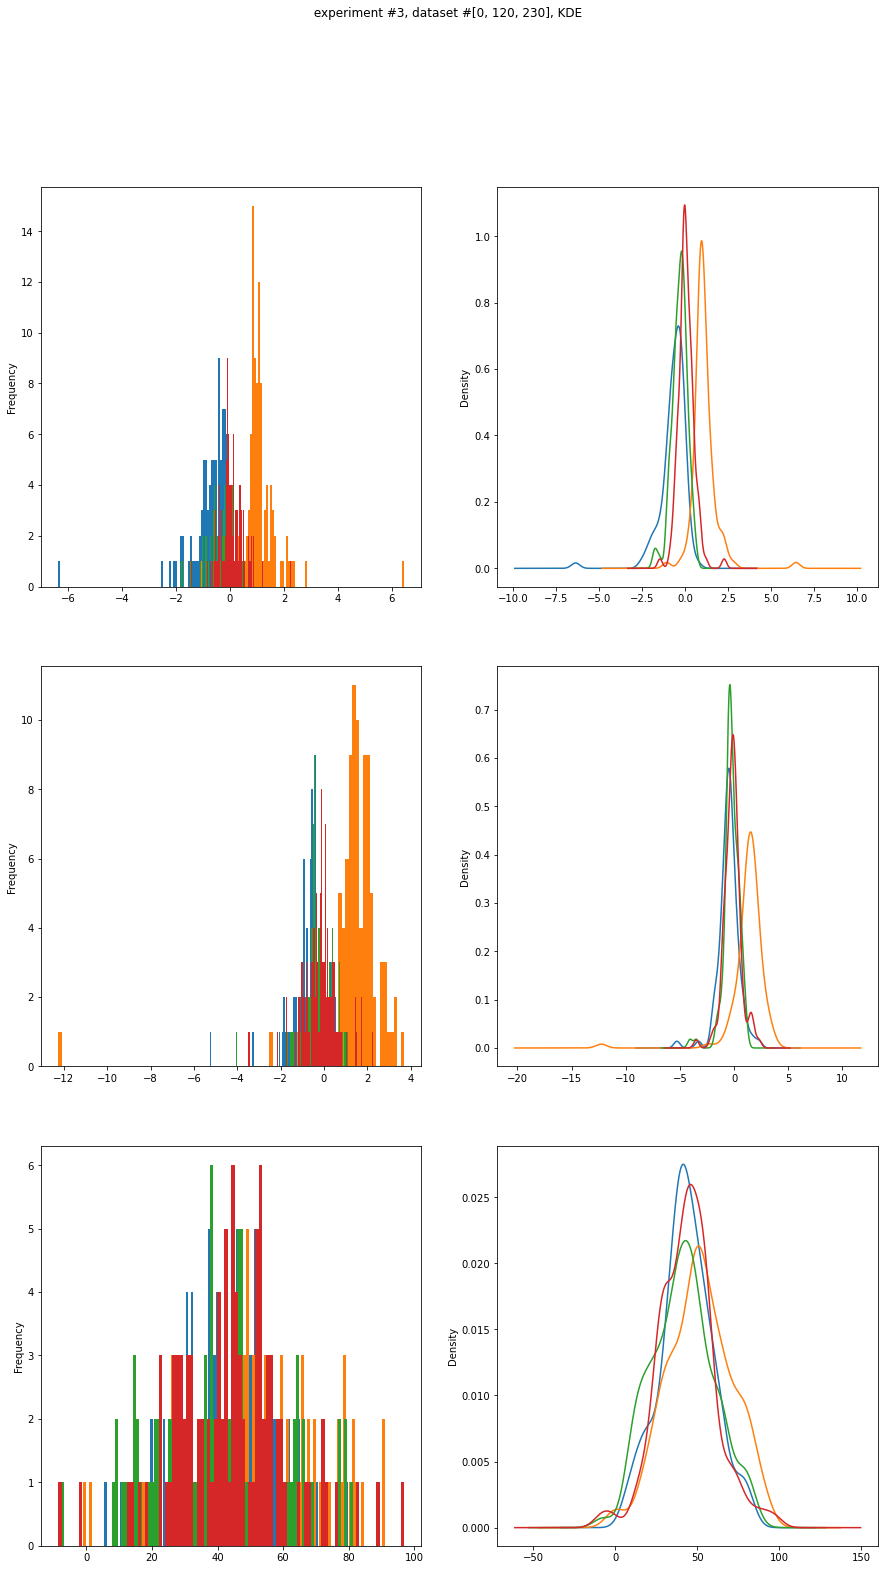

In [13]:
data_n = [0, 120, 230]
max_shape = 4 # number of experiments that are going to be plotted
plot_kde_hist(data_n, max_shape, sorted_forcast_list1)

## std of mean and std over time

In [14]:
## calculate the std over different repetitions
forecast_distrib_df1 = get_forcast_distrib(forcast_list1)
# convert the list of dataframes to a 3d np
forecast_np = get_np_forcast(forecast_distrib_df1)
# get std over different experiments
forecast_std_np = get_std_np(forecast_np, forecast_distrib_df1)
df_std_forecast = pd.DataFrame(forecast_std_np)
df_std_forecast.rename(index={0:'mean',1:'sigma'}, inplace=True)

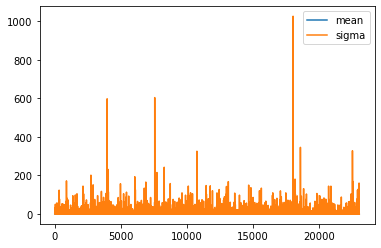

In [15]:
df_std_forecast.T.plot()

## plot samples of experimets

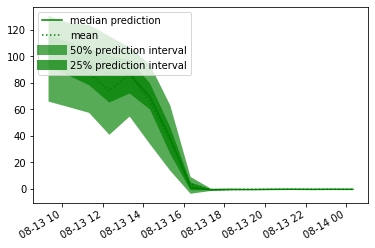

In [16]:
sample_forcast_list1 = get_forcast_samples(forcast_list1)
tmp_n = 23000
plot_forscast_same(sample_forcast_list1, tmp_n, lim=0)

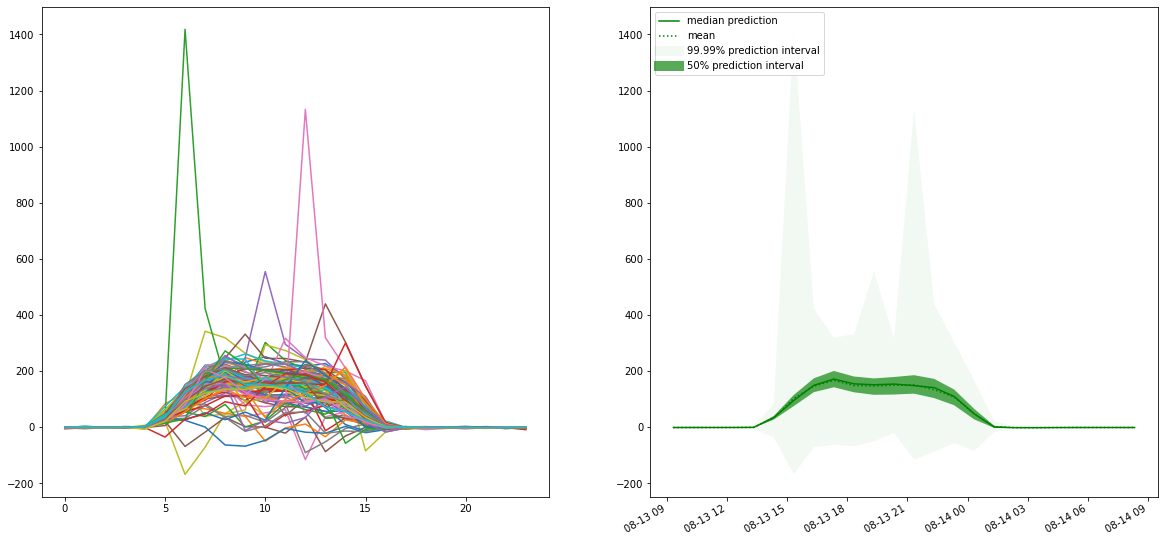

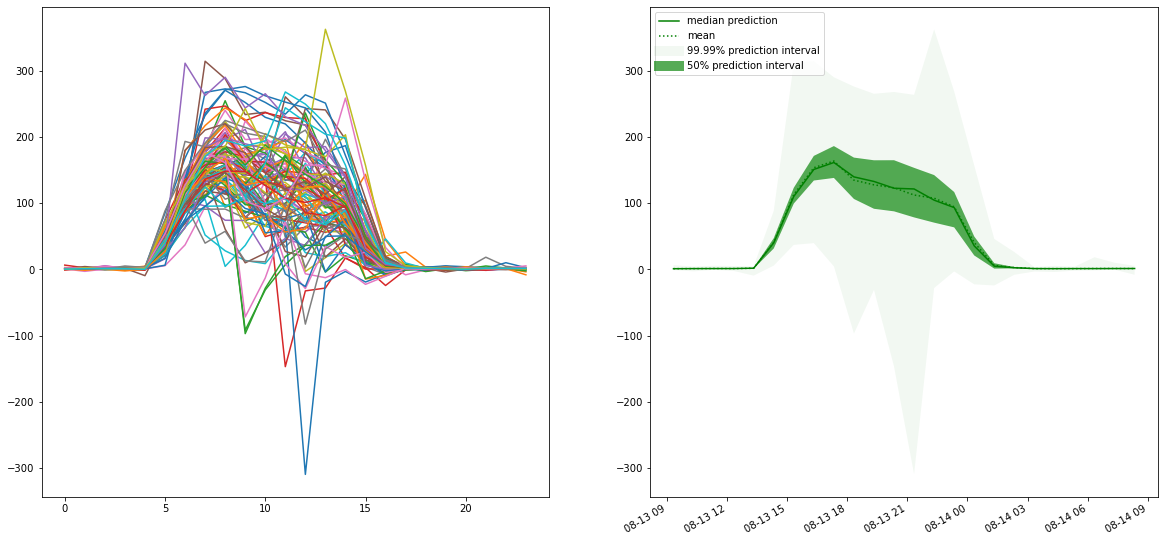

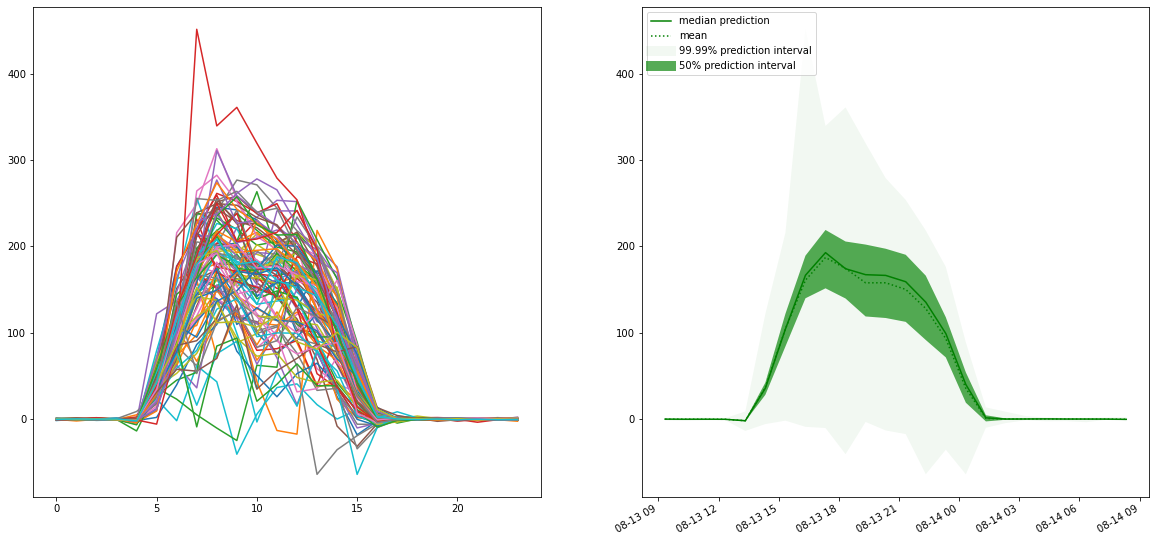

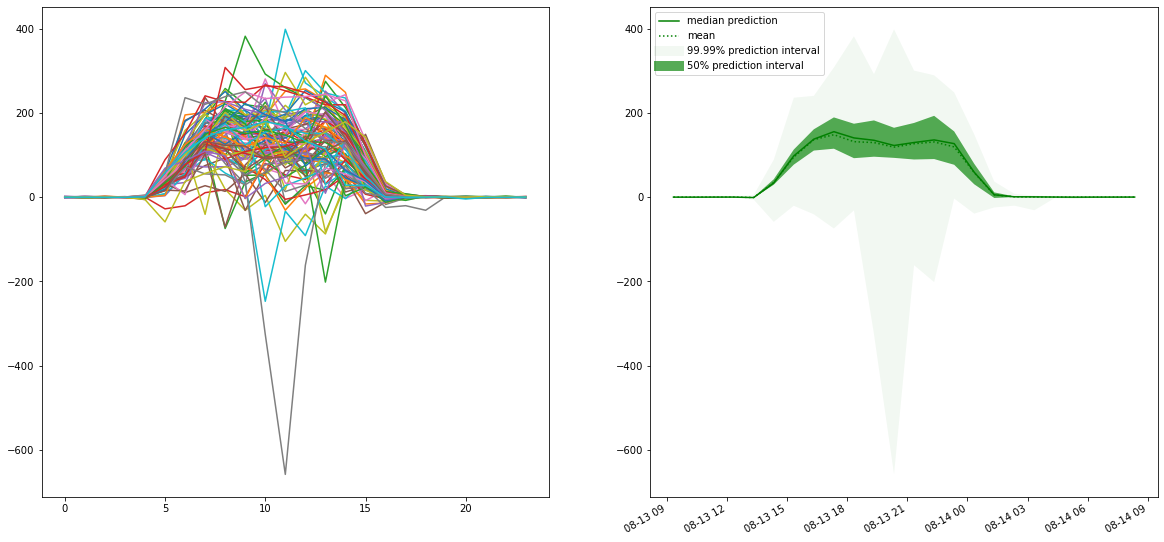

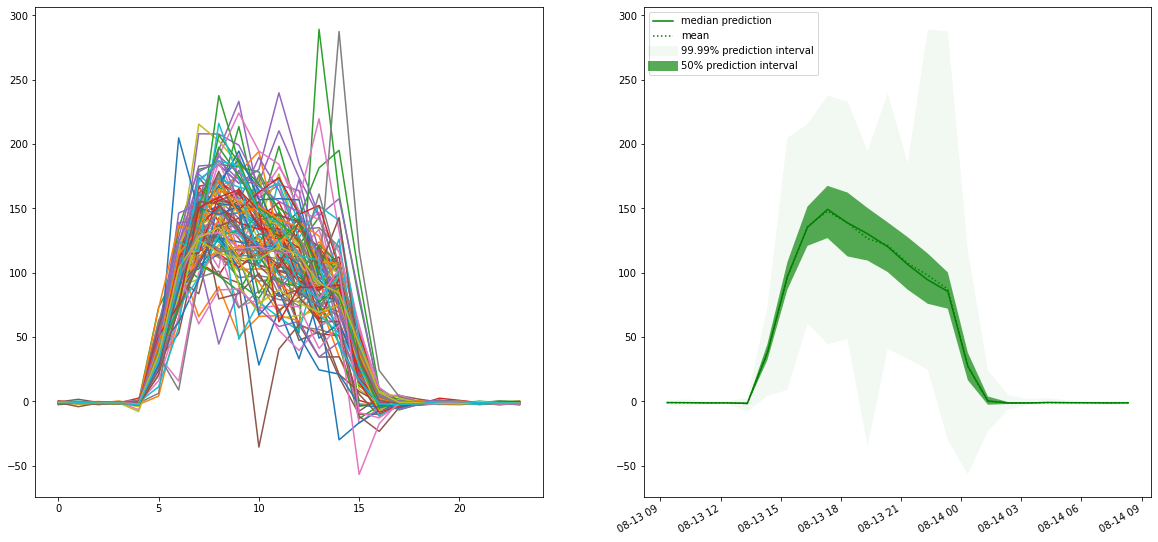

In [17]:
time_point_no = 0
rep_lim = 5
save_plot_exp(sample_forcast_list1, rep_lim, time_point_no)

## KS Test

In [18]:
# we set the datapoint to 4
data_n_el = 4

# make some samples to visualize
exp_n = 0
sample0 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 90
sample90 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 91
sample91 = sample_forcast_list1[exp_n][data_n_el]

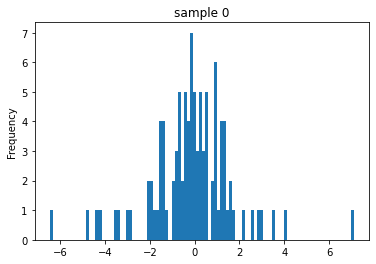

In [19]:
# plot the samples
plt.title('sample 0')
sample0.plot.hist(bins = 100)
# plt.xlim([-40,70])

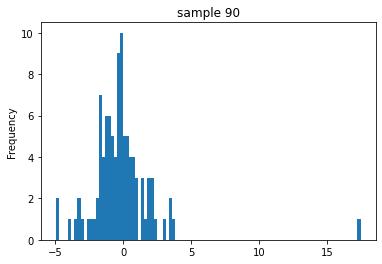

In [20]:
plt.title('sample 90')
sample90.plot.hist(bins = 100)
# plt.xlim([-40,70])

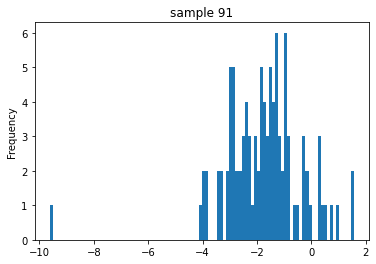

In [21]:
plt.title('sample 91')
sample91.plot.hist(bins = 100)
# plt.xlim([-40,70])

In [22]:
# calculate the table of ks tests for each time points
data_point = 4
ks_table = get_ks_tmp(sample_forcast_list1, data_point)

In [23]:
ks_table

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,True,False,False,False,False,True,False,False,True,False,...,True,False,True,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
# calculate the proportion of true/all for upper triangle of the table
portion_ks_table(ks_table)

0.1806060606060606

As it is apparant for tmp=12 the ks test gave us good results. however, for tmp=1000 it is not the case

In [25]:
# now we can loop through all 53000 time points and output the results
# try it for first 1000 points
tmp_lim = 100

portion_array = np.zeros(tmp_lim)

for data_point in range(tmp_lim):
    ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
    portion_array[data_point]= portion_ks_table(ks_table)
    print(data_point)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(0.0, 24.0)

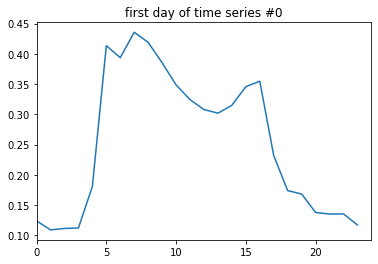

In [26]:
i = 0
plt.plot(portion_array[i*168: (i)*168 + 24])
plt.title(f'first day of time series #{i}')
plt.xlim(0,24)

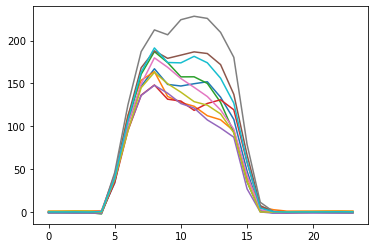

In [27]:
#time series number
i = 0

for j in range(10):
    (sorted_forcast_list1[j]['mean'].iloc[i*168: (i)*168 + 24]).plot()

# plt.plot(portion_array[i*168: (i)*168 + 24])
# plt.xlim(0,24)

Text(0.5, 1.0, 'time series #0')

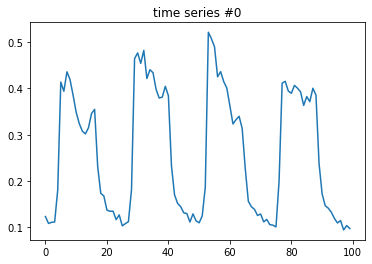

In [28]:
i = 0
plt.plot(portion_array[i*168 : (i+1)*168])
plt.title(f'time series #{i}')

Text(0.5, 1.0, 'all time series')

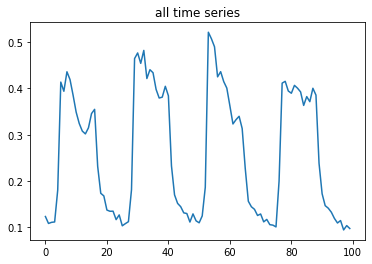

In [29]:
plt.plot(portion_array)
plt.title('all time series')